In [74]:
### PACKAGES
import csv
import numpy as np
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import keras


In [75]:
### CONSTANTS
ROOTPATH = './'
IMG_HEIGHT = 490
IMG_WIDTH = 680
NUM_CHANNELS = 3

In [76]:
train_img_names = [] # list of train image names as strings
train_img_labels = [] # list of train images labels as tuples (latitude, longitude)
with open('COMP90086_2021_Project_train/train.csv') as train_csv:
    reader = csv.reader(train_csv, delimiter=',')
    next(reader) # skip header row
    for row in reader:
        name = row[0] # string
        label = (float(row[1]), float(row[2])) # tuple
        train_img_names.append(name)
        train_img_labels.append(label)

# train images stored as numpy array
resize = 0.5
IMG_HEIGHT = int(IMG_HEIGHT * resize)
IMG_WIDTH = int(IMG_WIDTH * resize)
train_size = (len(train_img_names), IMG_HEIGHT, IMG_WIDTH,NUM_CHANNELS )
print(train_images.shape)


train_images = np.zeros(train_size, dtype='uint8')
for i in range(len(train_img_names)):
    name = train_img_names[i]
    subpath = 'COMP90086_2021_Project_train/train/' + name + '.jpg'
    img = cv2.imread(os.path.join(ROOTPATH, subpath))
    img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
#     print(img.shape)
    train_images[i] = img

# train labels stored as numpy array
train_labels = np.array(train_img_labels)
print(train_labels[0])
print(train_images.shape)


(7500, 343, 475, 3)
[-9.38067808  3.58271965]
(7500, 245, 340, 3)


In [77]:
test_img_names = [] # list of test image names as strings
with open('COMP90086_2021_Project_test/imagenames.csv') as test_csv:
    reader = csv.reader(test_csv, delimiter=',')
    next(reader) # skip header row
    for row in reader:
        name = row[0] # string
        test_img_names.append(name)
        
# test images stored as numpy array
test_size = (len(test_img_names), IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)
test_images = np.zeros(test_size, dtype='uint8')
for i in range(len(test_img_names)):
    name = test_img_names[i]
    subpath = 'COMP90086_2021_Project_test/test/' + name + '.jpg'
    img = cv2.imread(os.path.join(ROOTPATH, subpath))
    img = cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))

    
    test_images[i] = img
    
# train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32')
# test_images = test_images.reshape(test_images.shape[0], 32, 32, 3).astype('float32')


(245, 340, 3)


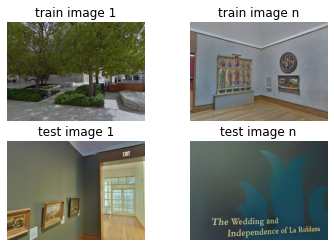

In [78]:
##CHECK
train_img_1 = cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB)
train_img_n = cv2.cvtColor(train_images[-1], cv2.COLOR_BGR2RGB)
test_img_1 = cv2.cvtColor(test_images[0], cv2.COLOR_BGR2RGB)
print(train_img_1.shape)
test_img_n = cv2.cvtColor(test_images[-1], cv2.COLOR_BGR2RGB)

plt.subplot(2,2,1)
plt.imshow(train_img_1) 
plt.title('train image 1')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(train_img_n) 
plt.title('train image n')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(test_img_1) 
plt.title('test image 1')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(test_img_n) 
plt.title('test image n')
plt.axis('off')
plt.show()

In [81]:
# FIRST ATTEMPT: BASELINE 
model = keras.models.Sequential()

model.add(layers.Input((IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2))


op = keras.optimizers.adam_v2.Adam()
model.compile(loss='mae', optimizer=op)
print(train_images.shape)
model.summary()

h = model.fit(train_images, train_labels,verbose = 1,batch_size=1,validation_split = 0.1,epochs = 20)

(7500, 245, 340, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 243, 338, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 241, 336, 16)      4624      
_________________________________________________________________
dense_2 (Dense)              (None, 241, 336, 16)      272       
_________________________________________________________________
dense_3 (Dense)              (None, 241, 336, 2)       34        
Total params: 5,826
Trainable params: 5,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6750/6750 [==============================] - 20s 3ms/step - loss: 41.3512 - val_loss: 38.8102
Epoch 2/20
6750/6750 [==============================] - 20s 3ms/step - loss: 40.5060 - val_loss: 38.8622
Epoch 3/20
6750/6750

In [79]:
import sys
def sizeof_fmt(num, suffix='B'):
    ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                  train_images:  1.7 GiB
                   test_images: 286.0 MiB
                           img: 244.2 KiB
                          img1: 244.2 KiB
                   train_img_1: 244.2 KiB
                   train_img_n: 244.2 KiB
                    test_img_1: 244.2 KiB
                    test_img_n: 244.2 KiB
                  train_labels: 117.3 KiB
               train_img_names: 65.6 KiB
